# Creating a Filter, Edge Detection

### Import resources and display image

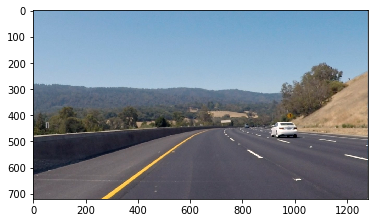

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('data/curved_lane.jpg')

plt.imshow(image)

### Convert the image to grayscale

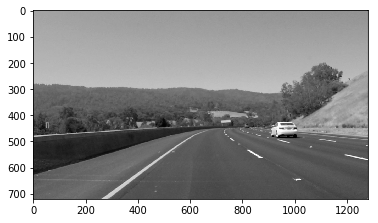

In [2]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

### TODO: Create a custom kernel

Below, you've been given one common type of edge detection filter: a Sobel operator.

The Sobel filter is very commonly used in edge detection and in finding patterns in intensity in an image. Applying a Sobel filter to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately. The operators look as follows.

<img src="data/sobel_ops.png" width=200 height=200>

**It's up to you to create a Sobel x operator and apply it to the given image.**

For a challenge, see if you can put the image through a series of filters: first one that blurs the image (takes an average of pixels), and then one that detects the edges.

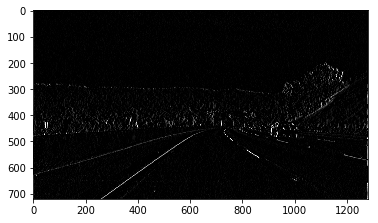

In [3]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

## TODO: Create and apply a Sobel x operator
sobel_x = np.array([[ -1, 0, 1], 
                   [ -2, 0, 2], 
                   [ -1, 0, 1]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image = cv2.filter2D(gray, -1, sobel_x)

plt.imshow(filtered_image, cmap='gray')

### Test out other filters!

You're encouraged to create other kinds of filters and apply them to see what happens! As an **optional exercise**, try the following:
* Create a filter with decimal value weights.
* Create a 5x5 filter
* Apply your filters to the other images in the `images` directory.



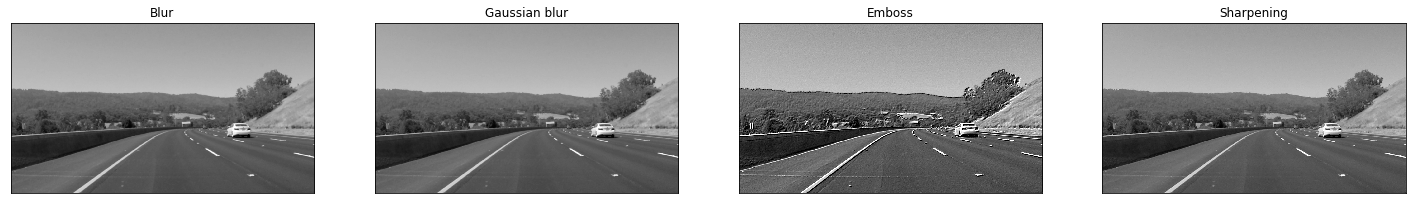

In [11]:
blur_filter = 1. / 9 * np.ones((3,3))
gaussian_blur = 1. / 16 * np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
emboss = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
sharpening_filter = np.array([[ 0, 0, 0], 
                              [ 0, 2, 0], 
                              [ 0, 0, 0]]) - blur_filter


fig = plt.figure(figsize=(25, 4))
labels = ['Blur', 'Gaussian blur', 'Emboss', 'Sharpening']
for idx, custom_filter in enumerate([blur_filter, gaussian_blur, emboss, sharpening_filter]):
    filtered_image = cv2.filter2D(gray, -1, custom_filter)
    # plt.imshow(filtered_image, cmap='gray')
    ax = fig.add_subplot(1, 4, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(filtered_image), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx])